*Creado por:*
    
*Isabel Maniega*

Se pide crear un Clasificador para el MNIST dataset

que incluya imágenes:
    
* en blanco y negro
* de 10 dígitos (0-9)
* 28x28 pixels

(28,28,1)

****

**en este caso:**

* (1) Dropout(0.5),

****

*Ejecutar el script en Colab*

# IMPORTAMOS NUESTRAS DEPENDENCIAS

In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.saving import load_model

from matplotlib import pyplot as plt

# LEEMOS LOS DATOS

In [2]:
# from keras.datasets import mnist

(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# print(x_train)
# print(y_train)
# print(x_valid)
# print(y_valid)

In [4]:
x_train.max(), x_valid.max(), x_train.min(), x_valid.min()

(np.uint8(255), np.uint8(255), np.uint8(0), np.uint8(0))

# NORMALIZAMOS LOS DATOS

**/255**

In [5]:
x_train = x_train.astype('float32') / 255.0
x_valid = x_valid.astype('float32') / 255.0

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_train.max(), x_valid.max(), x_train.min(), x_valid.min()

# se ve que está escalado entre 0 y 1

(np.float32(1.0), np.float32(1.0), np.float32(0.0), np.float32(0.0))

# reshape para x_train, x_valid

In [8]:
x_train = x_train.reshape((-1, 28, 28, 1))
x_valid = x_valid.reshape((-1, 28, 28, 1))

In [9]:
# print(x_train)
# print(x_valid)

# MODELO

In [10]:
model = Sequential([
        Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(units=128, activation='relu'),
        # aqui añadimos el Dropout
        Dropout(0.5),
        Dense(units=10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
early_stop = EarlyStopping(monitor='val_accuracy',
                           patience=5,
                           min_delta=0.01,
                           verbose=1)

In [13]:
history = model.fit(x=x_train, y=y_train,
                    epochs=10,
                    validation_data=(x_valid, y_valid),
                    callbacks=[early_stop])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 30ms/step - accuracy: 0.8671 - loss: 0.4146 - val_accuracy: 0.9831 - val_loss: 0.0531
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9759 - loss: 0.0800 - val_accuracy: 0.9862 - val_loss: 0.0409
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9825 - loss: 0.0579 - val_accuracy: 0.9889 - val_loss: 0.0311
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9866 - loss: 0.0461 - val_accuracy: 0.9907 - val_loss: 0.0245
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9888 - loss: 0.0377 - val_accuracy: 0.9901 - val_loss: 0.0282
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9904 - loss: 0.0324 - val_accuracy: 0.9934 - val_loss: 0.0210
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9928 - loss: 0.0251 - val_accuracy: 0.9934 - val_loss: 0.0226
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9919 -

# GRÁFICAS DE ENTRENAMIENTO

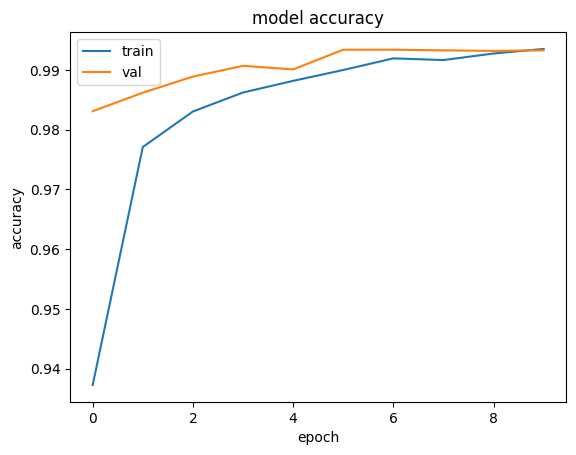

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

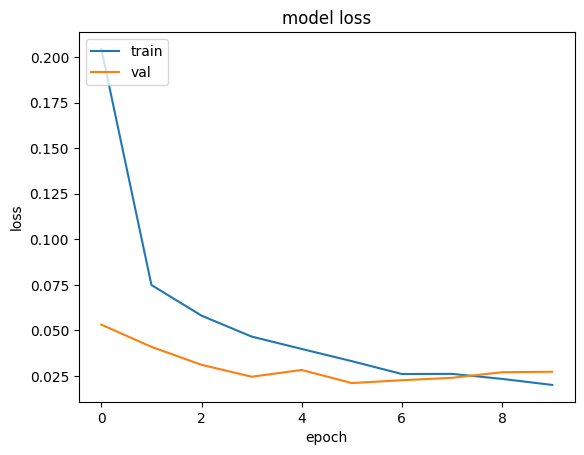

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [16]:
# model.evaluate(x_valid, y_valid)

# GUARDAMOS EL MODELO

In [17]:
model.save("model_3.h5")

# CARGAMOS EL MODELO

In [18]:
model = load_model("model_3.h5")

# RESUMEN

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,036 (879.05 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

# Evaluate

In [20]:
model.evaluate(x_valid, y_valid)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9911 - loss: 0.0344


[0.027253305539488792, 0.9933000206947327]

In [21]:
loss, accuracy = model.evaluate(x_valid, y_valid)
print('\n')
print('loss:', loss)
print('accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9911 - loss: 0.0344


loss: 0.027253305539488792
accuracy: 0.9933000206947327


*Creado por:*
    
*Isabel Maniega*